In [26]:
import pandas as pd

In [27]:
Raw_Housing_Data = pd.read_csv('/content/drive/MyDrive/Notebooks/Module 4 data exploration /1. Data exploration target variable/1. Regression - Module - (Housing Prices).csv')

In [28]:
Raw_Housing_Data.head(5)

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,Condition of the House,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,None,Fair,7,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,None,Fair,7,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,None,Fair,6,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,None,Excellent,7,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,None,Fair,8,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503


In [29]:
Raw_Housing_Data.dtypes

ID                                             int64
Date House was Sold                           object
Sale Price                                   float64
No of Bedrooms                                 int64
No of Bathrooms                              float64
Flat Area (in Sqft)                          float64
Lot Area (in Sqft)                           float64
No of Floors                                 float64
Waterfront View                               object
No of Times Visited                           object
Condition of the House                        object
Overall Grade                                  int64
Area of the House from Basement (in Sqft)    float64
Basement Area (in Sqft)                        int64
Age of House (in Years)                        int64
Renovated Year                                 int64
Zipcode                                      float64
Latitude                                     float64
Longitude                                    f

In [30]:
# for eye balling (to see the data )
Raw_Housing_Data['Sale Price'].head(5)

0    221900.0
1    538000.0
2    180000.0
3    604000.0
4    510000.0
Name: Sale Price, dtype: float64

In [31]:
Raw_Housing_Data['Sale Price'].tail(10)

21603     507250.0
21604     429000.0
21605     610685.0
21606    1010000.0
21607     475000.0
21608     360000.0
21609     400000.0
21610     402101.0
21611     400000.0
21612     325000.0
Name: Sale Price, dtype: float64

In [32]:
# descriptive stats
Raw_Housing_Data['Sale Price'].describe()

count    2.160900e+04
mean     5.401984e+05
std      3.673890e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: Sale Price, dtype: float64

In [33]:
# Outlier 
# it is a point which is quite diffrent from data set (extremely large or small)
# values lies outside the usual range 
# we start with scatter plot with row id as x axis 
import matplotlib.pyplot as plt


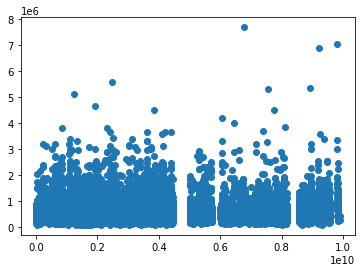

In [34]:
plt.scatter(x = Raw_Housing_Data['ID'],y = Raw_Housing_Data['Sale Price'])

In [35]:
# IQR = inter quartile range Q3(75%) - Q1(25%)
# lower_limit = max(min of data , Q1(25%) - 1.5*IQR )
# uppper_limit = min(max of dat , Q3 + 1.5*IQR )
Raw_Housing_Data['Sale Price'].describe()

count    2.160900e+04
mean     5.401984e+05
std      3.673890e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: Sale Price, dtype: float64

In [36]:
# seaborn library has the capacity to ignore the missig values unlike matplotlib
import seaborn as sns

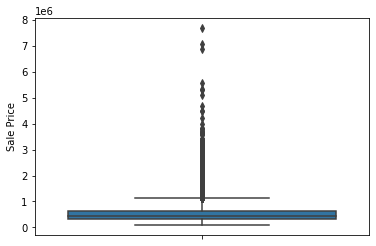

In [37]:
sns.boxplot(y = Raw_Housing_Data['Sale Price'])

In [38]:
# treating outliers with impunity
# IQR = inter quartile range Q3(75%) - Q1(25%)
# lower_limit = max(min of data , Q1(25%) - 1.5*IQR )
# uppper_limit = min(max of dat , Q3 + 1.5*IQR )
q1 = Raw_Housing_Data['Sale Price'].quantile(0.25)
q3 = Raw_Housing_Data['Sale Price'].quantile(0.75)
iqr = q3 - q1
lower_limit = max(q1 - 1.5*iqr, Raw_Housing_Data['Sale Price'].min())
upper_limit = min(q3 + 1.5*iqr,Raw_Housing_Data['Sale Price'].max())
print(lower_limit,' ',upper_limit)

75000.0   1129575.0


In [39]:
def limit_imputer(value):
  if value > upper_limit:
    return upper_limit
  elif value <= lower_limit:
    return lower_limit
  else:
    return value

In [40]:
Raw_Housing_Data['Sale Price'] = Raw_Housing_Data['Sale Price'].apply(limit_imputer) 

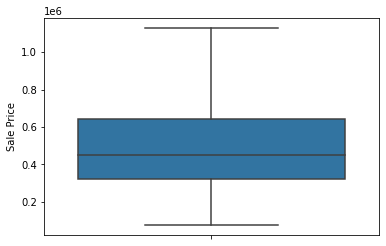

In [41]:
sns.boxplot(y = Raw_Housing_Data['Sale Price'])

In [42]:
Raw_Housing_Data.describe()

,ID,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
count,2.161300e+04,2.160900e+04,21613.000000,21609.000000,21604.000000,2.160400e+04,21613.000000,21613.000000,21610.000000,21613.000000,21613.000000,21613.000000,21612.000000,21612.000000,21612.000000,21612.000000,21613.000000
mean,4.580302e+09,5.116186e+05,3.370842,2.114732,2079.931772,1.510776e+04,1.494309,7.623467,1788.344193,291.509045,46.994864,84.402258,98077.937766,47.560048,-122.213892,1986.538914,12768.455652
std,2.876566e+09,2.500620e+05,0.930062,0.770138,918.487597,4.142827e+04,0.539989,1.105439,827.982604,442.575043,29.373411,401.679240,53.505425,0.138565,0.140830,685.404255,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,1.000000,290.000000,0.000000,3.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1429.250000,5.040000e+03,1.000000,7.000000,1190.000000,0.000000,21.000000,0.000000,98033.000000,47.470975,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.617500e+03,1.500000,7.000000,1560.000000,0.000000,43.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068825e+04,2.000000,8.000000,2210.000000,560.000000,67.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,1.129575e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,10.000000,9410.000000,4820.000000,118.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


**Re naming the data as raw housing data 1**
